# Exercise 5


In [32]:
from sklearn.feature_extraction.text import CountVectorizer


## Task 1)

In [49]:
#a)
with open("speech.txt", "r") as f:
    sentences = f.read().split(".")
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    sums = np.array(X.sum(0)).ravel()
    maximum_elements = np.argsort(-sums)[:10]
    
    feature_names = vectorizer.get_feature_names()
    maximum_names = [feature_names[i] for i in maximum_elements]

    

In [50]:
maximum_names

['the', 'and', 'of', 'to', 'we', 'this', 'in', 'be', 'for', 'that']

In [69]:
#b)

def bag_of_words(text):
    sentences = text.split(".")
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    sentences = [sentence.replace(".","") for sentence in sentences]
   
    clean_text = " ".join(sentences)
    
    words = set(clean_text.split(" "))
    words_dict = {word: index for index, word in enumerate(words)}
    
    bag = np.zeros((len(sentences), len(words)))
    
    for index, sentence in enumerate(sentences):
        sentence_words = sentence.split(" ")
        for word in sentence_words:
            bag[index, words_dict[word]] += 1
            
    return bag
    

In [71]:
t = "This is a test. This is a sentence too too"
print(bag_of_words(t))

[[1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 2.]]


## Task 2)

In [ ]:
#2.a)
#Dataset 1 - Both of Them
#Dataset 2 - None of them
#Dataset 3 - pca
#Dataset 4 - lda


In [72]:
#2.b)

Text(0.5, 1.0, 'LDA of the Iris dataset')

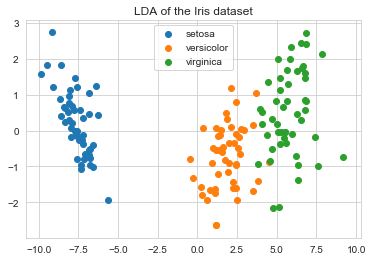

In [95]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

lda = LDA(n_components=2)
X_transformed = lda.fit(X,y).transform(X)

plt.figure()
for target in set(y):
    target_indices = y == target
    plt.scatter(X_transformed[target_indices, 0], X_transformed[target_indices, 1], label = target_names[target])
    
plt.legend()
plt.title("LDA of the Iris dataset")
